In [208]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [209]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

In [207]:
# import folium
# from IPython.display import Image
# MAP_CENTER = [48.387326, -122.3668255] 
# m = folium.Map(location=MAP_CENTER, tiles='Stamen Terrain', zoom_start=7) 
# folium.Marker(MAP_CENTER, popup='Skagit River Basin, WA').add_to(m); m

In [210]:
#load file
data = pd.read_csv('saturation_extent.txt', sep='\s+', header=None, names=["time", "sat_value"])
data.shape
#data.head # what the data looks like


(72562, 2)

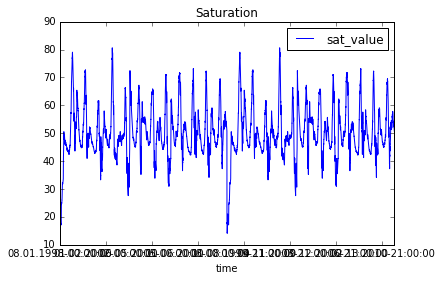

In [211]:
#plot data
%matplotlib inline
p = data.plot(x = 'time', y = 'sat_value')
#plt.plot("time", "sat_value")
plt.title('Saturation')
plt.show()

,time,sat_value
0,1998-08-01 00:00:00,20.0247
1,1998-08-01 03:00:00,18.6619
2,1998-08-01 06:00:00,18.3381
3,1998-08-01 09:00:00,18.1597
4,1998-08-01 12:00:00,18.0215


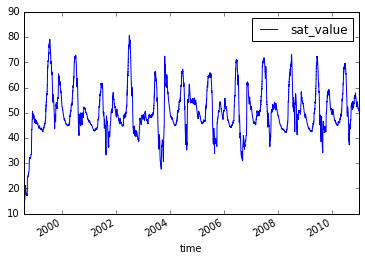

In [213]:
#type(data.time[2])
# time is string, convert to datetime format
data.time = data.time.apply(pd.to_datetime, dayfirst=False, yearfirst=False)
data.plot(x = 'time', y = 'sat_value')
data.head()

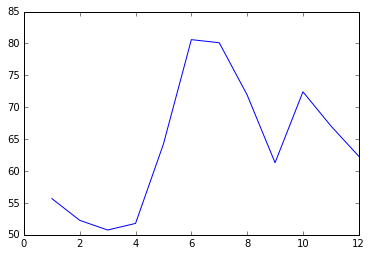

In [214]:
ds = data.to_xarray()
test_month = ds.groupby('time.month').max()
plt.plot(test_month.month, test_month.sat_value)

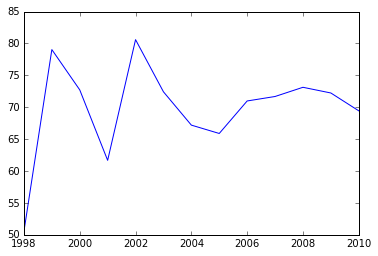

In [215]:
#gruoup by calendar year
test_year = ds.groupby('time.year').max()
plt.plot(test_year.year, test_year.sat_value)

In [217]:
# df = test.to_dataframe()
# df.head

In [218]:
data.index = data['time']
del data['time']
#data['doy']= data.index.dayofyear
data.head()
#type(data)

,sat_value
time,
1998-08-01 00:00:00,20.0247
1998-08-01 03:00:00,18.6619
1998-08-01 06:00:00,18.3381
1998-08-01 09:00:00,18.1597
1998-08-01 12:00:00,18.0215


In [219]:
data['doy']= data.index.dayofyear
data['cal_year'] = data.index.year
data['month'] = data.index.month
data['datetime'] = data.index
data.head()

,sat_value,doy,cal_year,month,datetime
time,,,,,
1998-08-01 00:00:00,20.0247,213,1998,8,1998-08-01 00:00:00
1998-08-01 03:00:00,18.6619,213,1998,8,1998-08-01 03:00:00
1998-08-01 06:00:00,18.3381,213,1998,8,1998-08-01 06:00:00
1998-08-01 09:00:00,18.1597,213,1998,8,1998-08-01 09:00:00
1998-08-01 12:00:00,18.0215,213,1998,8,1998-08-01 12:00:00


In [220]:
def calc_water_year(date):
    date = pd.to_datetime(date)
    if 10 <= date.month <= 12:
        water_year = date.year + 1
        return water_year
    else:
        return date.year

In [221]:
def calc_water_year_apply(df):
    df['water_year'] = df.datetime.apply(lambda row: calc_water_year(row))

In [222]:
calc_water_year_apply(data)
data.head()

,sat_value,doy,cal_year,month,datetime,water_year
time,,,,,,
1998-08-01 00:00:00,20.0247,213,1998,8,1998-08-01 00:00:00,1998
1998-08-01 03:00:00,18.6619,213,1998,8,1998-08-01 03:00:00,1998
1998-08-01 06:00:00,18.3381,213,1998,8,1998-08-01 06:00:00,1998
1998-08-01 09:00:00,18.1597,213,1998,8,1998-08-01 09:00:00,1998
1998-08-01 12:00:00,18.0215,213,1998,8,1998-08-01 12:00:00,1998


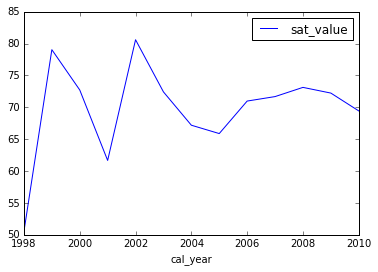

In [224]:
#check if it is the same as xarray
wy_max_sat_extent = data.groupby('cal_year')[['sat_value']].max()
wy_max_sat_extent.plot()

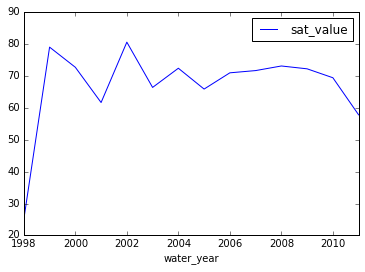

In [225]:
#plot by water year
wy_max_sat_extent = data.groupby('water_year')[['sat_value']].max()
wy_max_sat_extent.plot()

In [227]:

#(data.groupby(['water_year', 'sat_value']).max().loc[lambda df: data.water_year > 1999])
temp = data.loc[lambda df: (data.water_year == 1999), :]
#a = temp.groupby(['sat_value']).max()
#type(a)
#a.head()

In [228]:
temp1 = temp.groupby('water_year')[['sat_value']].max()
tem = temp.sort_values(by=['sat_value'], ascending=False)


In [229]:
grouped = data.groupby('water_year')

In [173]:
for name,group in grouped:
    print (name)
    #print (group)

1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011


In [230]:
#print (grouped.get_group(1999))
out_all = []
for name,group in grouped:
    #a = group.groupby(['sat_value']).max()
    a =group.sort_values(by=['sat_value'], ascending=False)
    out = a.iloc[0]
    out_all.append(out.datetime)
out_all
    #print(out)
    #print (name)
    #print (group)

[Timestamp('1998-09-27 03:00:00'),
 Timestamp('1999-07-17 15:00:00'),
 Timestamp('2000-07-03 21:00:00'),
 Timestamp('2001-06-28 15:00:00'),
 Timestamp('2002-06-29 21:00:00'),
 Timestamp('2003-06-19 15:00:00'),
 Timestamp('2003-10-22 21:00:00'),
 Timestamp('2005-06-27 15:00:00'),
 Timestamp('2006-06-21 15:00:00'),
 Timestamp('2007-06-30 15:00:00'),
 Timestamp('2008-07-04 15:00:00'),
 Timestamp('2009-06-15 15:00:00'),
 Timestamp('2010-06-29 15:00:00'),
 Timestamp('2010-11-17 21:00:00')]